In [22]:
import pandas as pd
import numpy as np
import inflection
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('raw_data/raw_data.csv')

In [4]:
cols_old = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase,cols_old))
df.columns = cols_new
df.columns

Index(['step', 'type', 'amount', 'name_orig', 'oldbalance_orig',
       'newbalance_orig', 'name_dest', 'oldbalance_dest', 'newbalance_dest',
       'is_fraud', 'is_flagged_fraud'],
      dtype='object')

In [22]:
df.isna().sum()

step                0
type                0
amount              0
name_orig           0
oldbalance_orig     0
newbalance_orig     0
name_dest           0
oldbalance_dest     0
newbalance_dest     0
is_fraud            0
is_flagged_fraud    0
date                0
hour                0
day                 0
dtype: int64

In [16]:
df.head()

,step,type,amount,name_orig,oldbalance_orig,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud,date,hour,day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0 days 01:00:00,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0 days 01:00:00,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0 days 01:00:00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0 days 01:00:00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0 days 01:00:00,1,0


In [17]:
df.dtypes

step                          int64
type                         object
amount                      float64
name_orig                    object
oldbalance_orig             float64
newbalance_orig             float64
name_dest                    object
oldbalance_dest             float64
newbalance_dest             float64
is_fraud                      int64
is_flagged_fraud              int64
date                timedelta64[ns]
hour                          int64
day                           int64
dtype: object

In [5]:
df['date']=''
df['date']=pd.to_timedelta(df['step'],unit='h')
df['hour']=''
df['hour']=df['date'].dt.components['hours']
df['day']=''
df['day']=df['date'].dt.components['days']


In [6]:
num_attributes = df.select_dtypes(include=['int64','float64'])
cat_attributes = df.select_dtypes(exclude=['int64','float64','timedelta64[ns]'])
d1 = num_attributes.describe().T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.skew()))
d2.columns = ['skew']
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis()))
d3.columns = ['kurtosis']
num_attributes_describe = pd.concat([d1,d2,d3],axis=1).reset_index()

In [32]:
num_attributes_describe

,index,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
0,step,6362620.000,243.397,142.332,1.000,156.000,239.000,335.000,743.000,0.375,0.329
1,amount,6362620.000,179861.904,603858.231,0.000,13389.570,74871.940,208721.478,92445516.640,30.994,1797.957
2,oldbalance_orig,6362620.000,833883.104,2888242.673,0.000,0.000,14208.000,107315.175,59585040.370,5.249,32.965
3,newbalance_orig,6362620.000,855113.669,2924048.503,0.000,0.000,0.000,144258.410,49585040.370,5.177,32.067
4,oldbalance_dest,6362620.000,1100701.667,3399180.113,0.000,0.000,132705.665,943036.708,356015889.350,19.922,948.674
5,newbalance_dest,6362620.000,1224996.398,3674128.942,0.000,0.000,214661.440,1111909.250,356179278.920,19.352,862.157
6,is_fraud,6362620.000,0.001,0.036,0.000,0.000,0.000,0.000,1.000,27.780,769.703
7,is_flagged_fraud,6362620.000,0.000,0.002,0.000,0.000,0.000,0.000,1.000,630.604,397659.062
8,hour,6362620.000,15.321,4.322,0.000,12.000,16.000,19.000,23.000,-0.606,0.684
9,day,6362620.000,9.503,5.922,0.000,6.000,9.000,13.000,30.000,0.378,0.332


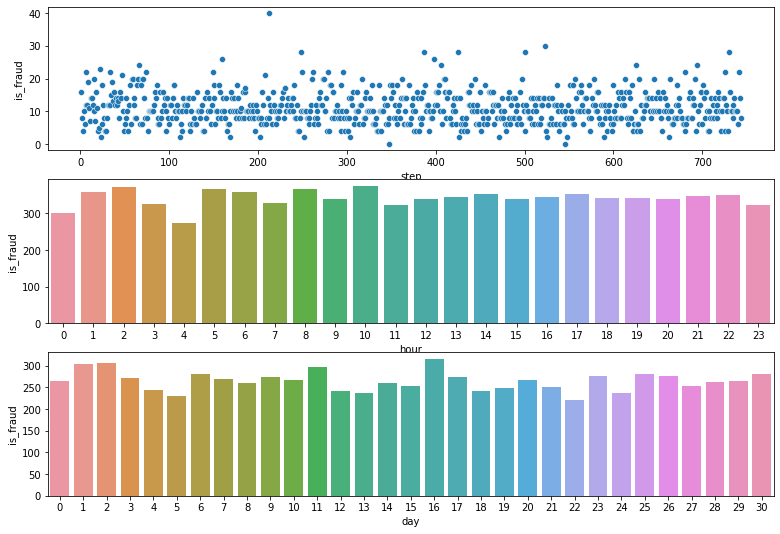

In [33]:
# There is a specific time when fraud occur more frequently - FALSE
rcParams['figure.figsize'] = 13,9
aux=df[['step','is_fraud']].groupby('step').sum().reset_index()
plt.subplot(3,1,1)
sns.scatterplot(x='step',y='is_fraud',data=aux)

aux1=df[['is_fraud','hour']].groupby('hour').sum().reset_index()
plt.subplot(3,1,2)
sns.barplot(x='hour',y='is_fraud',data=aux1);

aux1_1=df[['is_fraud','day']].groupby('day').sum().reset_index()
plt.subplot(3,1,3)
sns.barplot(x='day',y='is_fraud',data=aux1_1);

In [8]:
# Destination account that has received a fraudulent transaction before is more likely to repeat the fraud - False
aux2=df.loc[df['is_fraud']==1]
aux3=aux2[['name_dest','is_fraud']].groupby('name_dest').sum().reset_index()
aux4 = aux3.loc[aux3['is_fraud']>=2].reset_index()
print(aux3.shape)
print(aux4.shape)
print('Only {:.2f}% of the fraudulent transactions repeat the destination account'.format(aux4.shape[0]/aux2['is_fraud'].shape[0]*100))

(8169, 2)
(44, 3)
Only 0.54% of the fraudulent transactions repeat the destination account


In [61]:
# isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags 
# illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a 
# single transaction. 
aux5=df.loc[df['amount']>=200000].shape[0]
aux6=df.loc[df['is_flagged_fraud']==1].shape[0]
print('No of transactions which the amount is bigger than 200k: {}'.format(aux5))
print('No of transactions flagged as fraud: {}'.format(aux6))

No of transactions which the amount is bigger than 200k: 1673570
No of transactions flagged as fraud: 16


1673570